In [1]:
import pylab


import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dados = pd.read_csv('DADOS_2020.CSV', header=None)

### Tratamento dos dados 

In [3]:
dias = dados.iloc[:, 4]

In [4]:
dias = dados.iloc[:,4]
horas = []

DiaAtual = 0
ContadorDias = 0

for index in range(len(dias)):
    if( dias[index] == DiaAtual ):
        dias[index] = ContadorDias
    else:
        DiaAtual = dias[index]
        ContadorDias += 1
        dias[index] = ContadorDias
        
dias


                
    
dados = dados.iloc[:, 0:4]
dados = dados.join(pd.DataFrame(dias), how='outer', rsuffix=' ')
dados.columns = ['Solução 1', 'Solução 2', 'Solução 3', 'Solução 4', 'Dia']
dados = dados.set_index('Dia')
dados 

/home/blackknigth/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/home/blackknigth/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,Solução 1,Solução 2,Solução 3,Solução 4
Dia,,,,
1,-0.335,-0.535,-0.780,-0.767
1,-0.338,-0.541,-0.791,-0.787
1,-0.366,-0.549,-0.823,-0.824
1,-0.479,-0.572,-0.833,-0.831
1,-0.557,-0.648,-0.836,-0.836
...,...,...,...,...
87,-0.897,-0.577,-0.672,-0.587
87,-0.900,-0.650,-0.846,-0.594
87,-0.898,-0.629,-0.812,-0.590


In [5]:
def geraGrafico(nomeX, titulo, solucao, dadosmin, dadosmax, 
                limY_inf=0, limY_sup=2.5, minutos=1, cor='red'):
    solucao = solucao.iloc[range(dadosmin, dadosmax, minutos)] 
    plt.title(titulo, fontsize=14)
    plt.xlabel(nomeX, fontsize=14)
    plt.ylabel("Potential difference in Volts", fontsize=14)
    
    plt.ylim(limY_inf, limY_sup)
    plt.grid(True, linewidth=1)
    plt.gcf().autofmt_xdate()
    plt.plot(solucao, color=cor)

In [6]:
def FiltraPositivo(serie):
    Serie = []
    for elemento in serie:
        if(elemento > 0.00):
            Serie.append( -elemento )
        else:
            Serie.append( elemento )
    
    Serie = pd.Series(Serie, index=serie.index)
    return Serie
            #serie[elemento] = -serie[elemento]

### Filtrando os dados

In [7]:
solucao1 = dados.iloc[:, 0].dropna()
solucao1 = solucao1[(solucao1 >= -1.1) & (solucao1 <= 0.0)] 

solucao2 = dados.iloc[:, 1].dropna()
solucao2 = solucao2[solucao2 >= -1.1] 

solucao3 = dados.iloc[:, 2].dropna()
solucao3 = solucao3[solucao3 >= -1.1] 

solucao4 = dados.iloc[:, 3].dropna()
solucao4 = solucao4[solucao4 >= -0.7] 


solucao1 = -0.9484 - solucao1
solucao2 = solucao2 + 0.2518
solucao3 = -0.9484 - solucao3
solucao4 = solucao4 + 0.2518

#solucao1 = FiltraPositivo(solucao1)
#solucao2 = FiltraPositivo(solucao2)
#FiltraPositivo(solucao3)
#solucao3 = FiltraPositivo(solucao4)

solucao1

Dia
1    -0.6134
1    -0.6104
1    -0.5824
1    -0.4694
1    -0.3914
       ...  
87   -0.0514
87   -0.0484
87   -0.0504
87   -0.0504
87   -0.0534
Name: Solução 1, Length: 118505, dtype: float64

### Transformando as Datas

### Dados não filtrados

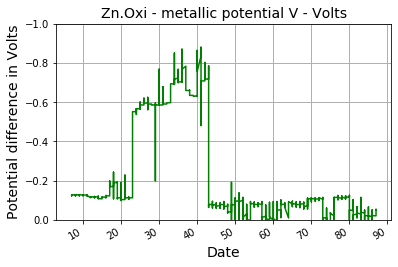

In [8]:
geraGrafico("Date", "Zn.Oxi - metallic potential V - Volts", solucao1, 7420, len(solucao1), 0, -1, 10, cor='green')

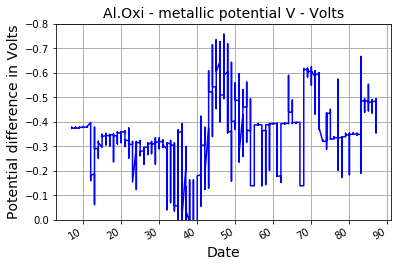

In [9]:
geraGrafico("Date", "Al.Oxi - metallic potential V - Volts",solucao2, 7420, len(solucao2),
            0, -0.8, 10, 'blue')

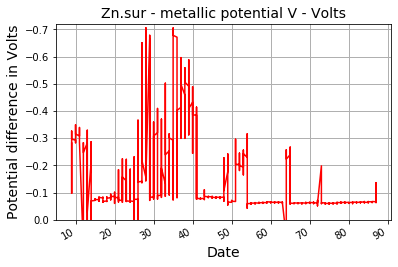

In [10]:
geraGrafico("Date", "Zn.sur - metallic potential V - Volts", solucao3, 7420, len(solucao3), 0, -0.72, 10, 'red')

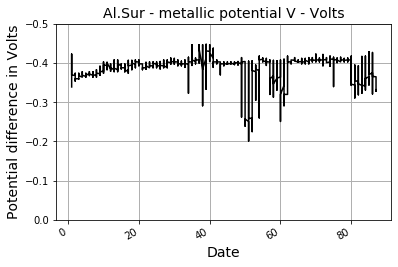

In [11]:
geraGrafico("Date", "Al.Sur - metallic potential V - Volts",solucao4, 0, len(solucao4), 0, -0.5, 10, 'black')

### Dados Filtrados

In [12]:
Solucao1Filtrada = solucao1.rolling(window=1000).mean()
Solucao1Filtrada.count()

117506

In [13]:
Solucao2Filtrada = solucao2.rolling(window=1000).mean()
print(Solucao2Filtrada.count())
Solucao2Filtrada = Solucao2Filtrada[Solucao2Filtrada > -0.62]

117548


In [14]:
Solucao3Filtrada = solucao3.rolling(window=1000).mean()
print(Solucao3Filtrada.count())
Solucao3Filtrada = Solucao3Filtrada[Solucao3Filtrada > -0.35]

112294


In [15]:
Solucao4Filtrada = solucao4.rolling(window=1000).mean()
Solucao4Filtrada.count()

115377

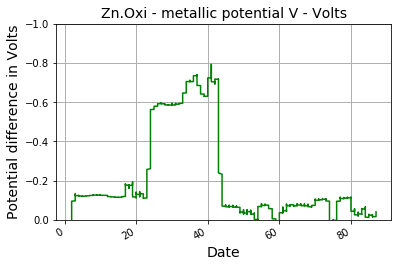

In [16]:
geraGrafico("Date", "Zn.Oxi - metallic potential V - Volts", Solucao1Filtrada, 700, len(Solucao1Filtrada), 0, -1, 10, cor='green')

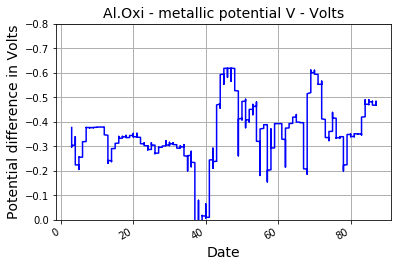

In [17]:
geraGrafico("Date", "Al.Oxi - metallic potential V - Volts",Solucao2Filtrada, 700, len(Solucao2Filtrada),
            0, -0.8, 10, 'blue')

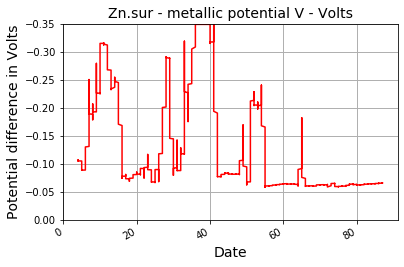

In [18]:
geraGrafico("Date", "Zn.sur - metallic potential V - Volts", Solucao3Filtrada, 700, len(Solucao3Filtrada), 0, -0.35, 10, 'red')

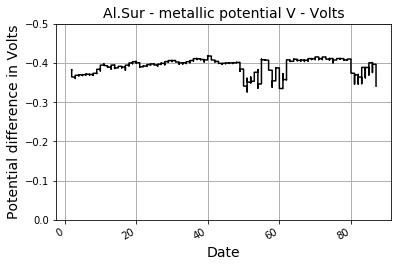

In [19]:
geraGrafico("Date", "Al.Sur - metallic potential V - Volts",Solucao4Filtrada, 0, len(Solucao4Filtrada), 0, -0.5, 10, 'black')

### Dias de captura dos dados

In [24]:
dados.to_excel( "Dados2020_agrupados.xlsx", sheet_name="Dados2020_agrupados" )